In [1]:
from qiskit.circuit import QuantumCircuit, Parameter, ParameterVector
# pip install bloch-sphere -----> very goo for visualisaing rotations, check out later

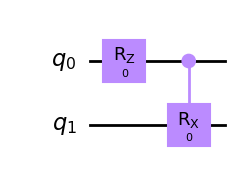

In [2]:
theta = Parameter('0') # defines the parameter to tune
qc = QuantumCircuit(2)
qc.rz(theta, 0)
qc.crx(theta, 0, 1)
qc.draw('mpl')


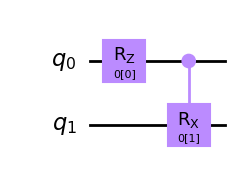

In [3]:
theta_list = ParameterVector('0', length=2) # defines the parameter vector for more than 1 parameter with lenght equal to the Qubit number
qc = QuantumCircuit(2)
qc.rz(theta_list[0], 0)
qc.crx(theta_list[1], 0, 1)
qc.draw('mpl')

Properties of Parameterized QC.
Expresibility: Covrerage of Hilbert space by circuits hypothesis space

Entanglement:

In [41]:
import numpy as np
import matplotlib.pyplot as plt
pi = np.pi

def state_to_bloch(state_vec):
    # Converts state vectors to points on the Bloch sphere
    phi = np.angle(state_vec.data[1])-np.angle(state_vec.data[0])
    theta = 2*np.arccos(np.abs(state_vec.data[0]))
    return [np.sin(theta)*np.cos(phi),np.sin(theta)*np.sin(phi),np.cos(theta)]


# First, we need to define the circuits:
theta_param = Parameter('θ')
phi_param = Parameter('Φ')

# Circuit A
qc_A = QuantumCircuit(1)
qc_A.h(0)
qc_A.rz(theta_param, 0)

# Circuit B
qc_B = QuantumCircuit(1)
qc_B.h(0)
qc_B.rz(theta_param, 0)
qc_B.rx(phi_param, 0)

# Next we uniformly sample the parameter space for the two parameters theta and phi
np.random.seed(0)
num_param = 1000
theta = [2*pi*np.random.uniform() for i in range(num_param)]
phi = [2*pi*np.random.uniform() for i in range(num_param)]

In [ ]:
# Then we take the parameter value lists, build the state vectors corresponding
# to each circuit, and plot them on the Bloch sphere:
from qiskit.visualization.bloch import Bloch
from qiskit.quantum_info import Statevector

# Bloch sphere plot formatting
width, height = plt.figaspect(1/2)
fig=plt.figure(figsize=(width, height))
ax1, ax2 = fig.add_subplot(1, 2, 1, projection='3d'), fig.add_subplot(1, 2, 2, projection='3d')
b1,b2 = Bloch(axes=ax1), Bloch(axes=ax2, background=True, view=[pi, pi])
b1.point_color, b2.point_color = ['tab:blue'],['tab:blue']
b1.point_marker, b2.point_marker= ['o'],['o']
b1.point_size, b2.point_size=[2],[2]

# Calculate state vectors for circuit A and circuit B for each set of sampled parameters
# and add to their respective Bloch sphere
for i in range(num_param):    
    state_1=Statevector.from_instruction(qc_A.bind_parameters({theta_param:theta[i]}))
    state_2=Statevector.from_instruction(qc_B.bind_parameters({theta_param:theta[i], phi_param:phi[i]}))
    b1.add_points(state_to_bloch(state_1))
    b2.add_points(state_to_bloch(state_2))


# b1.show()
# b2.show()

In [46]:
a = qc_A.bind_parameters({theta_param:theta[0]})


<class 'qiskit.circuit.quantumcircuit.QuantumCircuit'>


In [47]:
help(Statevector)

Help on class Statevector in module qiskit.quantum_info.states.statevector:

class Statevector(qiskit.quantum_info.states.quantum_state.QuantumState, qiskit.quantum_info.operators.mixins.tolerances.TolerancesMixin)
 |  Statevector(data: 'np.ndarray | list | Statevector | Operator | QuantumCircuit | Instruction', dims: 'int | tuple | list | None' = None)
 |  
 |  Statevector class
 |  
 |  Method resolution order:
 |      Statevector
 |      qiskit.quantum_info.states.quantum_state.QuantumState
 |      qiskit.quantum_info.operators.mixins.tolerances.TolerancesMixin
 |      builtins.object
 |  
 |  Methods defined here:
 |  
 |  __array__(self, dtype=None)
 |  
 |  __eq__(self, other)
 |      Return self==value.
 |  
 |  __getitem__(self, key: 'int | str') -> 'np.complex128'
 |      Return Statevector item either by index or binary label
 |      Args:
 |          key (int or str): index or corresponding binary label, e.g. '01' = 1.
 |      
 |      Returns:
 |          numpy.complex128: 

TypeError: Bloch.__init__() got an unexpected keyword argument 'vector_width'

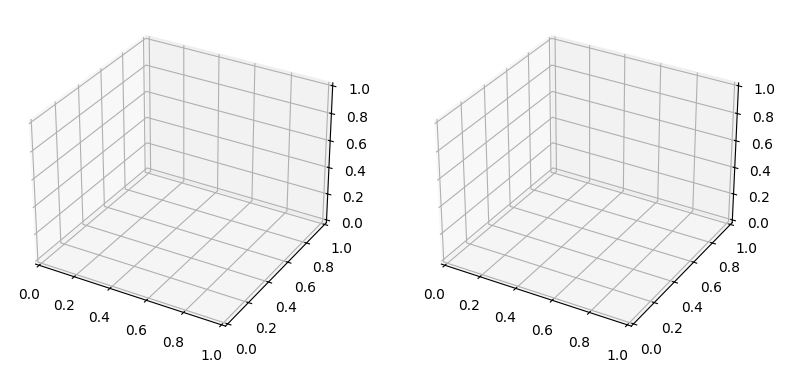

In [9]:










b1.show()
b2.show()